<a href="https://colab.research.google.com/github/pedr19faria/Neuro-Comp/blob/main/Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [106]:
def met_euler(f, y0, dt, t0, tf, ti_disp, tf_disparo ,gm = 100.,J =2.,E =0., cm = 1.):


  t_total = int((tf - t0)/dt)  + 1

  y = np.zeros((t_total)) # array for y values in each time step

  t = np.zeros((t_total))
  t[0] = t0
  y[0] = y0

  for i in range( t_total-1):
    t[i + 1] = t[i] + dt
    if t[i] >= ti_disp and t[i] <= tf_disparo:
      y[i+1] = y[i] + dt*f(t[i], y[i],gm,cm,E,J)
    else:
      y[i+1] = y[i] + dt*f(t[i], y[i],gm,cm,E,J = 0.)

  return t, y

####**Questão 1.**
**Função de membrana:** \
$\tau\dfrac{dV(t)}{dt} = -V_m(t) + E + RI_{injetada}$ \
Sendo $\tau = R_mC_m$, $I = JA$, $R = \dfrac{R_m}{A}$ e $R_m = \dfrac{1}{g_m}$\
Substituindo esse valores: \
$\dfrac{C_m}{g_m}\dfrac{dV(t)}{dt} = E - V_m + \dfrac{J}{g_m}$ \
Por fim, \
$\dfrac{dV(t)}{dt} = \dfrac{g_m}{C_m}(E - V_m) + \dfrac{J}{C_m}$ \
Essa é a **função de membrana** em termos da condutância, $g_m$, capacitância, $C_m$ e densidade de corrente, $J$. Se usarmos as seguintes unidades de medida: $g_m$ : $[\dfrac{\mu S}{cm^2}]$, $C_m$ : $[\dfrac{\mu F}{cm^2}]$, $J$ : $[\dfrac{\mu A}{cm^2}]$, $V$ : $mV$ e $t$ :$ms$ na fórmula teremos que multiplicar o termo $(E - V_m(t))$  por $10^{-3}$ para garantir que as unidades de medida sejam respeitadas. \
$\dfrac{dV(t)}{dt} = \dfrac{g_m}{C_m}(E - V_m)*10^{-3} + \dfrac{J}{C_m}$



In [31]:
def f( t, u ,gm,cm,E,J):
    volt = (gm/cm)*(E - u)*1e-3 + (J/cm)
    return volt
    

####**Questão 2.**

In [32]:

time, potential = met_euler(f,0., 1, 0., 80, 5, 50)


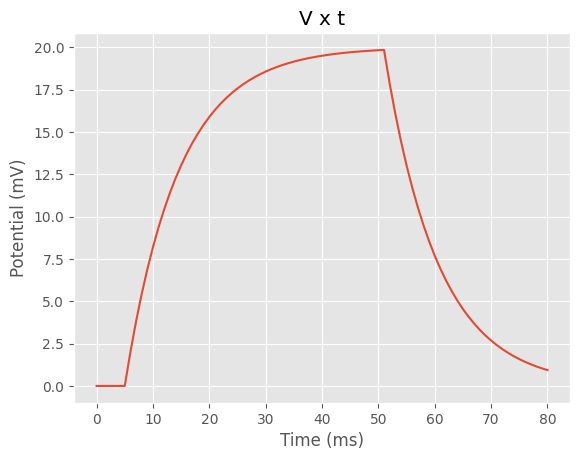

In [33]:
plt.plot(time, potential)

plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.title('V x t')

plt.show()


Após $t=5$, o momento em que a corrente é injetada, o potencial aumenta, tendendo para seu potencial estacionário $V_{\infty} = RI_{inj}$, que no caso é igual a $20mV$. Assim se o período em que a corrente fosse injetada fosse maior veríamos o potencial se mantendo em tal valor até o fim da corrente.

####**Questão 3.**

In [34]:
time200, potential200 = met_euler(f,0., 1., 0., 80., 5., 50., gm = 200)

In [35]:
time50, potential50 = met_euler(f,0., 1., 0., 80., 5., 50., gm = 50)

In [36]:
time20, potential20 = met_euler(f,0., 1., 0., 80., 5., 50., gm = 20)

In [37]:
time10, potential10 = met_euler(f,0., 1., 0., 80., 5., 50., gm = 10)

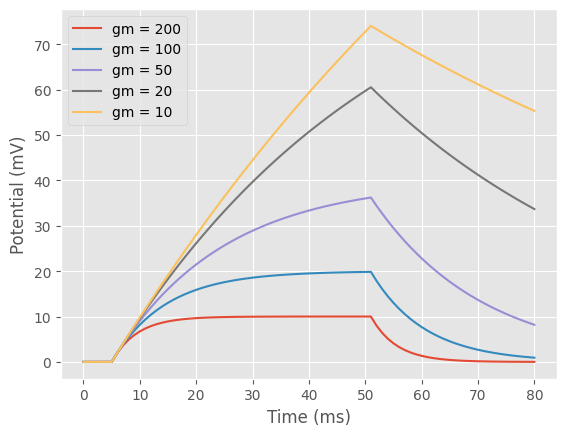

In [38]:
plt.plot(time200, potential200, label = 'gm = 200' )
plt.plot(time, potential, label = 'gm = 100' )
plt.plot(time50, potential50, label = 'gm = 50' )
plt.plot(time20, potential20, label = 'gm = 20' )
plt.plot(time10, potential10, label = 'gm = 10' )

plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.legend()
plt.show()

$g_m$ é a condutância específica de uma membrana- condutância de uma área unitária - essa variável indica a capacidade de deixar fluir corrente elétrica. Assim, quanto maior for a capacitância, mais corrente passará, e quando pensamos na célula uma maior condutância indica que mais íons passarão no canal iônico aberto. Deve-se lembrar que ela é oposta a **resistência** - $g_m = \dfrac{1}{R_m}$ - que se opõe ao movimento das correntes. \
Os gráficos de $V$ x $t$ mostram que enquanto não houver a passagem de corrente o potencial se mantém igual ao potencial de repouso, que no caso é igual a E = 0 mV. Quando ocorre um estímulo da corrente os valores do potencial aumentam até chegarem em seu potencial estacionário, sendo $V_{\infty} = RI_{inj}$ o potencial estacionário. Assim que a corrente é desligada os valores do potencial tendem ao potencial de repouso e esse decrescimento é exponencial. Deve-se observar que o tempo não é suficiente para que esses valores sejam alcançados, com exceção de quando $g_m = 200$, porém já é possível perceber qual é a tendência dos potenciais. Ademais, percebe-se que quanto menor $g_m$, maior será o potencial.

####**Questão 4.** 
$\dfrac{dV(t)}{dt} = \dfrac{g_m}{C_m}(E - V_m) + \dfrac{J}{C_m}$ \
 Como estamos usando as medidas do SI, [Volt], [Segundo], [Ampére], [Siemens], [Farads], então não há mais a necessidade do fator multiplicativo $10^{-3}$ em $(E - Vm)$.

In [103]:
def fSI( t, u ,gm,cm,E,J):
    volt = (gm/cm)*(E - u) + (J/cm)
    return volt

In [107]:
timeSI, potentialSI = met_euler(fSI,0., 1e-3, 0., 80, 5, 50)


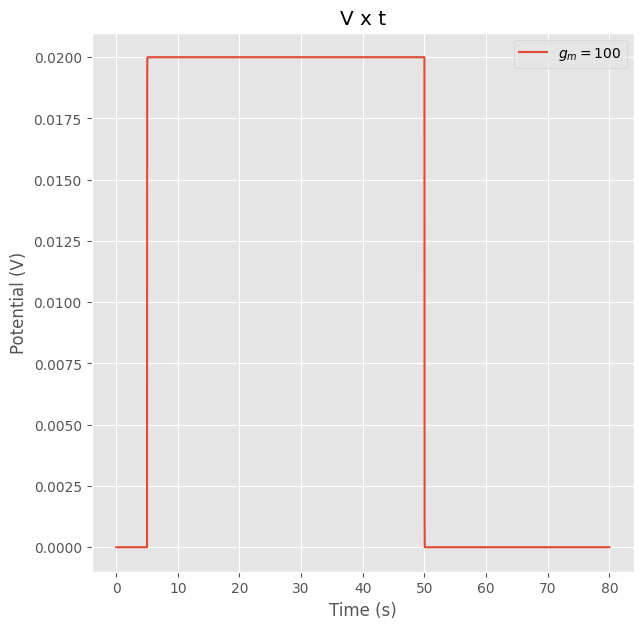

In [108]:
fig, ax = plt.subplots(figsize = (7,7))


ax.plot(timeSI, potentialSI, label = r'$g_m = 100$' )


#ax_zoom = plt.axes([0.4, 0.5, 0.2, 0.2])

#ax_zoom.plot(timeSI, potentialSI)

#ax_zoom.set_xlim(0., 80e-3)
#ax_zoom.set_ylim(0., 50e-3)
#ax_zoom.set_title('Zoom')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Potential (V)")
ax.set_title('V x t')
ax.legend()
plt.show()


Percebe-se que os valores do potencial se mantém iguais àqueles mostrados na **questão 1**, porém são $10^{-3}$ vezes menores, já que a unidade de medidas agora é o SI. Nesse caso, a injeção da corrente vai de 5s até 50s, assim dura um tempo maior e o potencial chega seu potencial estacionário. Deve-se notar, porém que por serem valores de tempo muito grandes, perde-se na precisão e as curvas de crescimento e decrescimento parecem ser lineares, embora, como já visto, elas não são.

####**Questão 5.**


In [54]:
# A função sympy é usada para resolver de maneira analítica a função.
import sympy as sp
sp.init_printing() 

In [55]:
V = sp.Function('V')
Cm, gm, Vm, E, J, t = sp.symbols('C_m, g_m, V_m, E, J, t')
Cvalue = 1
gmvalue = 100
Jvalue = 2
Evalue = 0.
eq = sp.Eq(V(t).diff(t,1), (gm/Cm)*(-V(t) + E) + (J/Cm))
eq

d          J    gₘ⋅(E - V(t))
──(V(t)) = ── + ─────────────
dt         Cₘ         Cₘ     

In [56]:
sol = sp.dsolve(eq, ics = {V(0):E})
sol

                   -gₘ⋅t 
                   ──────
                     Cₘ  
           J    J⋅ℯ      
V(t) = E + ── - ─────────
           gₘ       gₘ   

In [57]:
tl = np.linspace(0, 20e-3, 1000)
V_t = sp.lambdify(t, sol.rhs.subs({E:Evalue, J:Jvalue, gm:gmvalue, Cm: Cvalue, Vm : 0.}), 'numpy')
Vt = V_t(tl)


Text(0.5, 1.0, 'V x t')

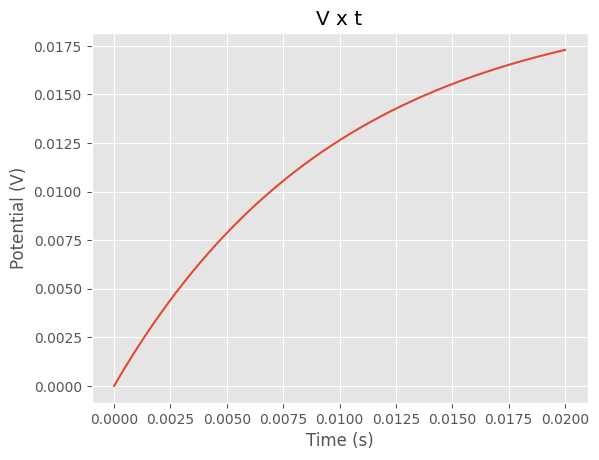

In [58]:
plt.plot(tl, Vt)
plt.ylabel("Potential (V)")
plt.xlabel('Time (s)')
plt.title('V x t')

Percebe-se que assim como visto anteriormente essa função cresce e tende a seu valor de potencial estacionário.

In [59]:
import timeit

In [68]:
timeSI5, potentialSI5 = met_euler(fSI,0., 5e-4, 0., 20e-3, 0., 20e-3)
elapsed_time5 = timeit.timeit(lambda:met_euler(fSI,0., 5e-4, 0., 20e-3, 0., 20e-3), number=5)

timeSI4, potentialSI4 = met_euler(fSI,0., 1e-3, 0., 20e-3, 0., 20e-3)
elapsed_time4 = timeit.timeit(lambda:met_euler(fSI,0., 1e-3, 0., 20e-3, 0., 20e-3), number=5)

timeSI3, potentialSI3 = met_euler(fSI,0., 2e-3, 0., 20e-3, 0., 20e-3)
elapsed_time3 = timeit.timeit(lambda: met_euler(fSI,0., 2e-3, 0., 20e-3, 0., 20e-3), number=5)

timeSI2, potentialSI2 = met_euler(fSI,0., 1e-2, 0., 20e-3, 0., 20e-3)
elapsed_time2 = timeit.timeit(lambda: met_euler(fSI,0., 1e-2, 0., 20e-3, 0., 20e-3), number=5)

timeSI1, potentialSI1 = met_euler(fSI,0., 1e-1, 0., 20e-3, 0., 20e-3)
elapsed_time1 = timeit.timeit(lambda: met_euler(fSI,0., 1e-1, 0., 20e-3, 0., 20e-3), number=5)

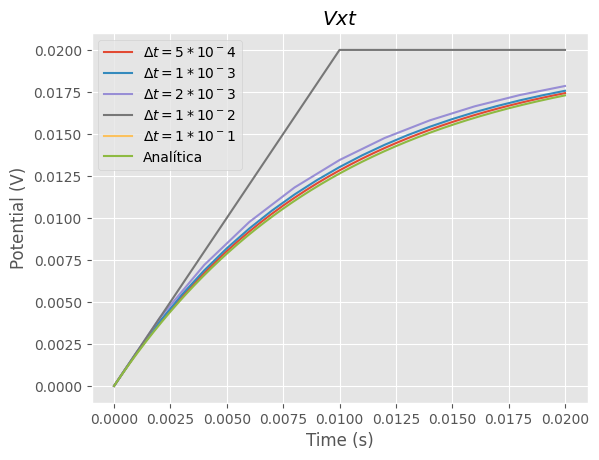

In [69]:
plt.plot(timeSI5, potentialSI5, label = r'$\Delta t = 5*10^-4$' )
plt.plot(timeSI4, potentialSI4, label = r'$\Delta t = 1*10^-3$' )
plt.plot(timeSI3, potentialSI3, label = r'$\Delta t = 2*10^-3$' )
plt.plot(timeSI2, potentialSI2, label = r'$\Delta t = 1*10^-2$' )
plt.plot(timeSI1, potentialSI1, label = r'$\Delta t = 1*10^-1$' )
plt.plot(tl, Vt, label = r'Analítica')
plt.title(r'$V x t$')
plt.ylabel('Potential (V)')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

In [70]:
tl5 = np.linspace(0, 20e-3, len(timeSI5))
Vt5 = V_t(tl5)

tl4 = np.linspace(0, 20e-3, len(timeSI4))
Vt4 = V_t(tl4)

tl3 = np.linspace(0, 20e-3, len(timeSI3))
Vt3 = V_t(tl3)

tl2 = np.linspace(0, 20e-3, len(timeSI2))
Vt2 = V_t(tl2)


tl1= np.linspace(0, 20e-3, len(timeSI1))
Vt1 = V_t(tl1)
### Pegando valores de tempo de acordo com o tamanho de cada função resolvida numericamente
### uma vez que o tamanho do passo afeta a quantidade de pontos que sera utilizada e dessa
### forma para comparar a analítica com a numérica é necessário analisar ponto por ponto.

In [71]:
er_rel = []
er_rel2 = []
er_rel3 = []
er_rel4 = []
er_rel5 = []
for i in range(len(Vt5)):
  if Vt5[i] != 0:
    er_rel.append((Vt5[i] - potentialSI5[i])/Vt5[i])
  else:
    er_rel.append(0)
  
for i in range(len(Vt4)):
  if Vt4[i] == 0:
    er_rel2.append(0.)
  else:
    er_rel2.append((Vt4[i] - potentialSI4[i])/Vt4[i])
for i in range(len(Vt3)):
  if Vt3[i] != 0:
    er_rel3.append((Vt3[i] - potentialSI3[i])/Vt3[i])
  else:
    er_rel3.append(0.)

for i in range(len(Vt2)):
  if Vt2[i] != 0:
    er_rel4.append((Vt2[i] - potentialSI2[i])/Vt2[i])
  else:
    er_rel4.append(0.)

for i in range(len(Vt1)):
  if Vt1[i] != 0:
    er_rel5.append((Vt1[i] - potentialSI1[i])/Vt1[i])
  else:
    er_rel5.append(0.)


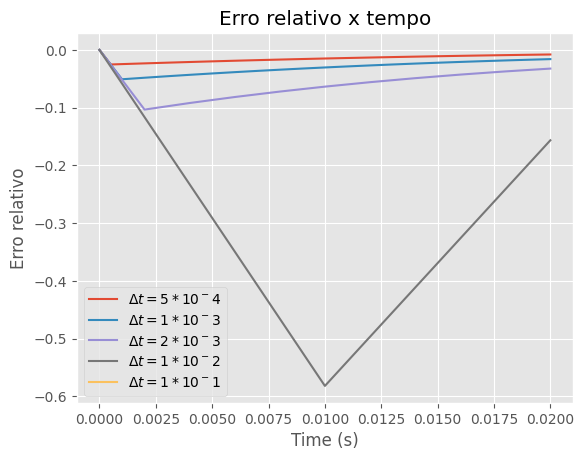

In [72]:
plt.plot(timeSI5, er_rel, label = r'$\Delta t = 5*10^-4$' )
plt.plot(timeSI4, er_rel2, label = r'$\Delta t = 1*10^-3$' )
plt.plot(timeSI3, er_rel3, label = r'$\Delta t = 2*10^-3$' )
plt.plot(timeSI2, er_rel4, label = r'$\Delta t = 1*10^-2$' )
plt.plot(timeSI1, er_rel5, label = r'$\Delta t = 1*10^-1$' )
plt.xlabel('Time (s)')
plt.ylabel('Erro relativo')
plt.title('Erro relativo x tempo')
plt.legend()
plt.show()

É notável que, assim como esperado, quanto mais pontos pegamos, ou seja, quanto menor for nosso passo menor será o erro relativo. Dessa forma, a escolha de um passo menor garante que a solução numérica será mais estável e precisa, tendendo cada vez mais ao valor de uma solução analítica.

In [73]:
from tabulate import tabulate

In [74]:
data = [
    ['$ 5*10^-4$', [elapsed_time5]],
    ['$ 1*10^-3$', [elapsed_time4]],
    ['$ 2*10^-3$', [elapsed_time3]],
    ['$ 1*10^-2$', [elapsed_time2]],
    ['$ 1*10^-1$', [elapsed_time1]]

]
headers = ['Δt', 'Elapsed Time']

In [75]:
table = tabulate(data, headers, tablefmt='fancy_grid')


print(table)

╒════════════╤══════════════════════════╕
│ Δt         │ Elapsed Time             │
╞════════════╪══════════════════════════╡
│ $ 5*10^-4$ │ [0.0005499690005308366]  │
├────────────┼──────────────────────────┤
│ $ 1*10^-3$ │ [0.0002814680001392844]  │
├────────────┼──────────────────────────┤
│ $ 2*10^-3$ │ [0.00017527800082461908] │
├────────────┼──────────────────────────┤
│ $ 1*10^-2$ │ [5.635599973174976e-05]  │
├────────────┼──────────────────────────┤
│ $ 1*10^-1$ │ [3.058499987673713e-05]  │
╘════════════╧══════════════════════════╛


Embora as soluções numéricas com passos de iterações menores sejam mais precisas, elas gastam tempos maiores para fazer essas contas. Assim, ao escolher um passo deve-se avaliar tanto o quão preciso queremos que nossa função seja, quanto a velocidade em que queremos que ela seja feita, tentando buscar um valor que compense para ambos os casos. Nessa simulação, embora o passo de $5*10^{-4}$ demore mais que as outras o tempo ainda é bem pequeno e a precisão já é maior, assim ainda vale a pena seu uso, por exemplo.

$\tau = R_mC_m = \dfrac{C_m}{g_m} = \dfrac{1*10^{-6}}{100*1*10^{-6}} = (1*10^-2) s$ \
O $\tau$ é uma constante de tempo capacitiva do circuito que mostra quanto ela demora para carregar ou descarregar e a taxa em que os potenciais e outras propriedades do circuito mudam em resposta aos estímulos recebidos. Como já explicado o passo de iteração determina quão preciso será o sistema representado, assim queremos um passo que seja pequeno o suficiente para conseguir representar bem as dinâmicas do que está sendo estudado. Dessa forma, buscamos um passo de iteração que seja menor que o valor de $\tau$ para que as mudanças que ocorrem sejam bem capturadas pelo sistema e por isso os melhores valores para o passo de iteração, $\Delta t$, que são $\Delta t = 5*10^{-4} s$ e $\Delta t = 1*10^{-3} s$ são menores que o $\tau$.